#### Discrete Simulation HW5
#### Problem 1, 2
Authored: Austin Jetrin Maddison 6481268

In [2]:
from my_settings import *

In [3]:
def toilet_distribution(n):
    dist_sorted =  np.arange(n, dtype=float)[::-1]
    dist_sorted *= 1.0/dist_sorted.sum() # normalize
    dist_perm = np.random.permutation(dist_sorted)
    return dist_sorted, dist_perm

def toilet_rank(n, k):
    t_sorted, t_perm = toilet_distribution(n)

    learn_mask = np.zeros(t_sorted.size, dtype=bool)
    learn_mask[:k] = True
    best = np.max(t_perm * learn_mask) # best in learning phase

    # candidates are better toilets than best k+1...n
    candidates = (t_perm >= best) & ~learn_mask
    first_candidate = np.argmax(candidates)

    # possible ranks
    rank_candidate_exists =  np.argmax(t_perm[first_candidate] == t_sorted)
    rank_candidate_not_exist =  np.argmax(t_perm[n-1] == t_sorted)

    return rank_candidate_not_exist + (candidates.sum() > 0) * ( rank_candidate_exists - rank_candidate_not_exist )

def ToiletDistribution(n, k, N, density=True):
    f = np.vectorize(lambda x: toilet_rank(n, k) )
    samples = f(np.zeros(N, dtype=int))
    return  np.bincount(samples, minlength=n-1) / N if density else np.bincount(samples, minlength=n-1)

In [4]:
# distrib equals 1
toilet_distribution(100)[0].sum()

1.0000000000000002

In [5]:
np.random.seed(27)
res = ToiletDistribution(100, 37, N= 100_000)
res

array([0.3704 , 0.13956, 0.06473, 0.03361, 0.01906, 0.01199, 0.00799,
       0.00589, 0.00481, 0.00463, 0.00414, 0.00349, 0.0042 , 0.00413,
       0.00349, 0.00359, 0.00371, 0.00374, 0.00399, 0.00341, 0.00391,
       0.00374, 0.00344, 0.00383, 0.00353, 0.00379, 0.004  , 0.0039 ,
       0.00359, 0.00386, 0.00363, 0.00363, 0.00366, 0.00399, 0.00333,
       0.00402, 0.00326, 0.00383, 0.00372, 0.00382, 0.00388, 0.00413,
       0.00392, 0.00399, 0.00383, 0.00351, 0.00367, 0.00385, 0.00364,
       0.00367, 0.00398, 0.00372, 0.00369, 0.00366, 0.00369, 0.00388,
       0.0035 , 0.00386, 0.0034 , 0.0036 , 0.00364, 0.00374, 0.00373,
       0.00374, 0.00364, 0.00397, 0.0035 , 0.0036 , 0.00401, 0.00397,
       0.0038 , 0.0039 , 0.00382, 0.00383, 0.00316, 0.00393, 0.00414,
       0.00389, 0.00394, 0.00379, 0.00371, 0.00363, 0.0038 , 0.00327,
       0.00395, 0.00341, 0.00344, 0.00393, 0.00356, 0.0034 , 0.00376,
       0.00389, 0.00396, 0.00369, 0.00382, 0.00366, 0.00396, 0.004  ,
       0.00367, 0.00

### P1

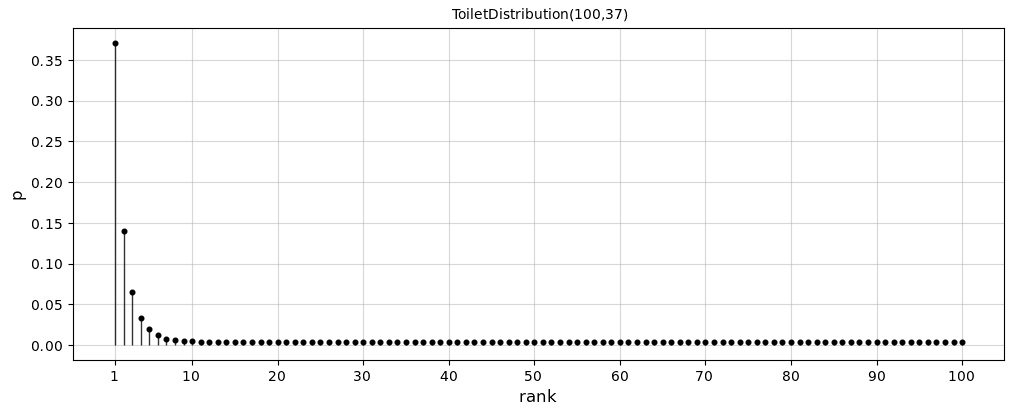

In [6]:
hist = res
edge = np.arange(1, 101)

plt.figure(figsize=(10, 4))
plt.scatter(edge, hist, s=11, color="k", marker='o', zorder=4)
plt.vlines(edge, ymax=hist, ymin=np.zeros(hist.size), color='k', alpha=0.8, linewidth=1)
plt.xticks(np.linspace(1, 100, 11, dtype=int))

plt.grid(alpha=0.5)

plt.title("ToiletDistribution(100,37)", fontsize=10)
plt.xlabel("rank", fontsize=12)
plt.ylabel("p", fontsize=12)
plt.tight_layout(pad=0.2)

plt.tight_layout(pad=0.2)
plt.savefig("../drawings/p1.pdf")

### P2

In [10]:
n = 100
N = 100_000
np.random.seed(27)
ks = np.arange(0, n)

def ToiletDistributionMean(n, k, N):
    res = ToiletDistribution(n, k, N, density=False)
    res = res * np.arange(1, res.size+1)
    return res.mean()

f = np.vectorize(lambda x : ( ToiletDistributionMean(n, x, N=N) ))
xs = f(ks)

In [13]:
n = np.argmin(xs)
intersection = (n, xs[n].item())
print(f'k = {intersection[0]}, mean rank = {intersection[1]}')

k = 9, mean rank = 9618.7


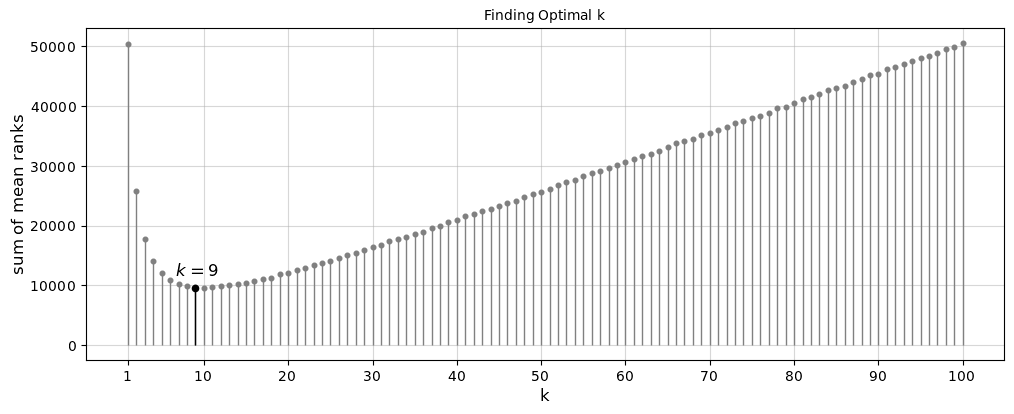

In [50]:
hist = xs
edge = np.arange(1, 101)

plt.figure(figsize=(10, 4))
plt.scatter(edge, hist, s=11, color="gray", marker='o', zorder=4)
plt.vlines(edge, ymax=hist, ymin=np.zeros(hist.size), color='gray', linewidth=1)
plt.vlines(edge[intersection[0]-1], ymax=hist[intersection[0]], ymin=np.zeros(hist.size)[intersection[0]], color='k', linewidth=1)
plt.xticks(np.linspace(1, 100, 11, dtype=int))


plt.scatter(intersection[0], intersection[1], s=20, color='k', marker='o', zorder=100)
plt.annotate(f"$k={{{n}}}$",(intersection[0]-2.25, intersection[1]+ 2000), fontsize=12)

plt.grid(alpha=0.5)

plt.title("Finding Optimal k", fontsize=10)
plt.xlabel("k", fontsize=12)
plt.ylabel("sum of mean ranks", fontsize=12)
plt.tight_layout(pad=0.2)

plt.tight_layout(pad=0.2)
plt.savefig("../drawings/p2.pdf")

k=9 seems to yield the most optimal rank on average.